In [60]:
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

In [61]:
def polynomial_regression(X, y, order=1, confidence=95, num=100):
    confidence = 1 - ((1 - (confidence / 100)) / 2)
    y_model = np.polyval(np.polyfit(X, y, order), X)
    residual = y - y_model
    n = X.size                     
    m = 2                          
    dof = n - m  
    t = stats.t.ppf(confidence, dof) 
    std_error = (np.sum(residual**2) / dof)**.5
    X_line = np.linspace(np.min(X), np.max(X), num)
    y_line = np.polyval(np.polyfit(X, y, order), X_line)
    ci = t * std_error * (1/n + (X_line - np.mean(X))**2 / np.sum((X - np.mean(X))**2))**.5
    return X_line, y_line, ci

In [62]:
def format_func_M(value, tick_number):
    # find number of multiples of pi/2
    if value % 1000000 == 0:
        value = '{:.0f}'.format(value / 1000000)
        return str(value) + "M"
    


In [115]:
def format_func_K(value, tick_number):
    # find number of multiples of pi/2
    if value % 500 == 0:
        value = '{:.1f}'.format(value / 1000)
        return str(value) + "K"
    


In [133]:
def fitDepthCounts(df, types, order): #types genes or junctions
    df.columns = ['level', 'count', 'depth', 'depth_unique', 'sample']
    X_line, y_line, ci = polynomial_regression(df['depth_unique'], df['count'], order=order)
    #sns.set(font_scale=1.5)
    #print(df.head())
    
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.set_facecolor("white")
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(2) 
    ax.grid(False)
    
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func_M))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func_K))
    
    ax.scatter(df['depth_unique'], df['count'])
    ax.plot(X_line, y_line)
    plt.ylabel('# of ' + types)
    ax.fill_between(X_line, y_line - ci, y_line + ci, alpha=.5)
    
    #plt.grid(color='black', linestyle='-', linewidth=1)
    coef_array = np.polyfit(df['depth_unique'], df['count'], order)
    plt.show()
    return(coef_array)

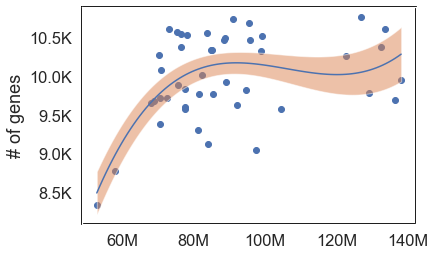

In [141]:
df = pd.read_csv("majiq_covid_genes_alpha_high_1st", sep=' ', header=None)#for the 1-5 days: majiq_covid_genes_alpha_high_1st
coefficients = fitDepthCounts(df, "genes", 3)

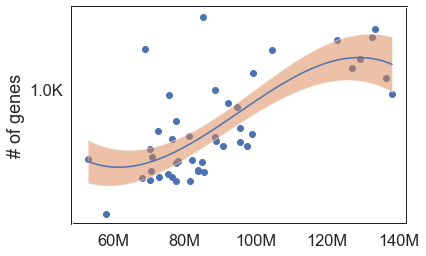

In [142]:
df = pd.read_csv("majiq_covid_genes_alpha_mid_1st", sep=' ', header=None)#for the 1-5 days: majiq_covid_genes_alpha_mid_1st
coefficients = fitDepthCounts(df, "genes", 3)

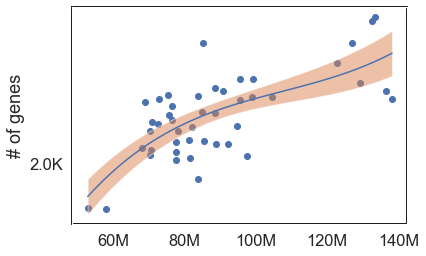

In [143]:
df = pd.read_csv("majiq_covid_genes_alpha_low_1st", sep=' ', header=None)#for the 1-5 days: majiq_covid_genes_alpha_low_1st
coefficients = fitDepthCounts(df, "genes", 3)

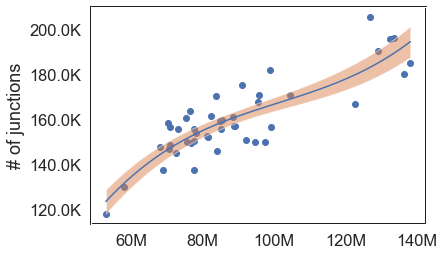

In [144]:
df = pd.read_csv("majiq_covid_junctions_alpha_high_1st", sep=' ', header=None)#for the 1-5 days: majiq_covid_genes_alpha_high_1st
coefficients = fitDepthCounts(df, "junctions", 3)

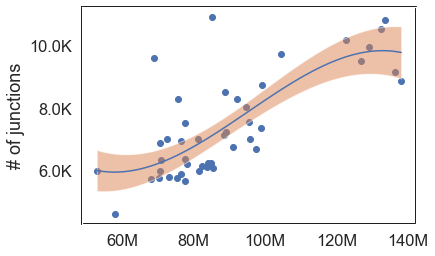

In [145]:
df = pd.read_csv("majiq_covid_junctions_alpha_mid_1st", sep=' ', header=None)#for the 1-5 days: majiq_covid_genes_alpha_mid_1st
coefficients = fitDepthCounts(df, "junctions", 3)

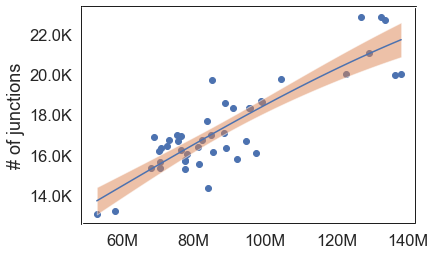

In [147]:
df = pd.read_csv("majiq_covid_junctions_alpha_low_1st", sep=' ', header=None)#for the 1-5 days: majiq_covid_genes_alpha_low_1st
coefficients = fitDepthCounts(df, "junctions", 3)